In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [13]:
adelie = penguins[penguins['species'] == 'Adelie'].dropna()[:100]
print(adelie.shape)

(100, 7)


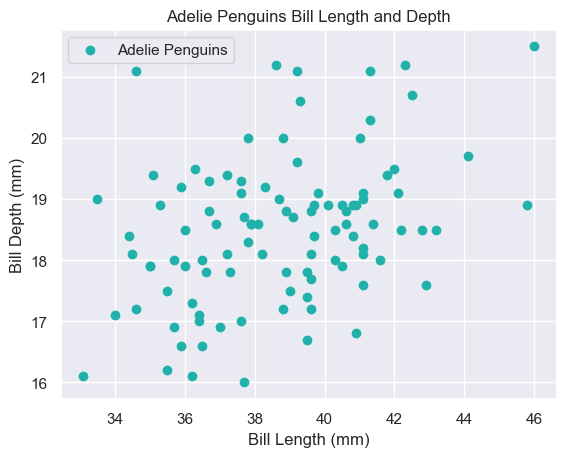

In [14]:
plt.scatter(adelie.bill_length_mm, adelie.bill_depth_mm, color = "lightseagreen",
            label = "Adelie Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Adelie Penguins Bill Length and Depth")
plt.legend()
plt.show()

In [8]:
def linear_activation(z):
    return z

In [9]:
X = np.array(adelie["bill_length_mm"])
X = X.reshape(-1, 1)
y = np.array(adelie["bill_depth_mm"])

print(X.shape)
print(y.shape)

(146, 1)
(146,)


In [55]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.0005, epochs = 50):
        self.w = np.random.rand(X.shape[1]).reshape(-1, 1)
        self.b = np.random.rand()
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w -= alpha*error*xi
                self.b -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        # return self

    def predict(self, x):
        preactivation = np.dot(x, self.w) + self.b
        return self.activation_function(preactivation)

In [58]:
node = SingleNeuron(linear_activation)
node.train(X, y, epochs = 100)

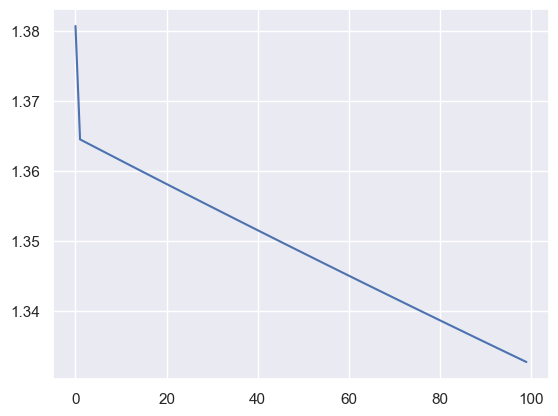

In [59]:
plt.plot(node.errors_)
plt.show()

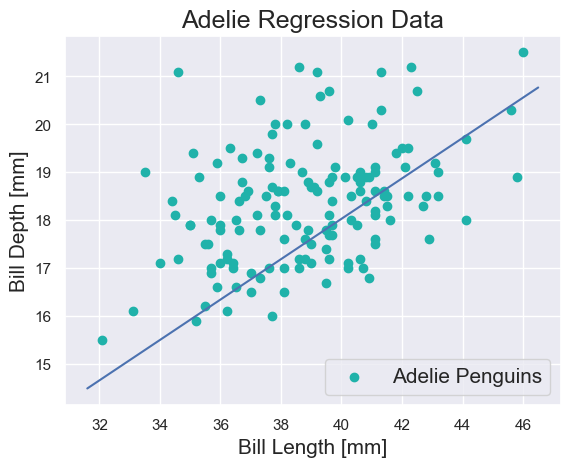

In [60]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.scatter(X, y, color = "lightseagreen", label = "Adelie Penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Depth [mm]", fontsize = 15)
plt.title("Adelie Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()